**Trabalho feito por José Freitas Alves Neto**
Matrícula: 2327663

# Análise de correlação da nota do filme e seus atributos.

Importando os dados e bibliotecas

In [ ]:
!gdown 1VGB5ANovGJQG2ko4_anIjvnVnd7fEN7d
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
dados = pd.read_csv('rotten_tomatoes.zip',compression = 'zip')
dados.columns

Downloading...
From: https://drive.google.com/uc?id=1VGB5ANovGJQG2ko4_anIjvnVnd7fEN7d
To: /content/rotten_tomatoes.zip
100% 18.4M/18.4M [00:00<00:00, 41.4MB/s]


Index(['modality', 'genre', 'url', 'mined', 'title', 'tomatometerscore',
       'tomatometerstate', 'audiencescore', 'audiencestate', 'synopsis',
       'info', 'actor_url', 'actor_name', 'actor_char'],
      dtype='object')

Tratando os dados

In [ ]:
# Renomeando as colunas
dados.columns = ['Modalidade', 'Gênero', 'Link', 'Minado', 'Título', 'Escore_tomate',
       'Avaliação_tomate', 'Escore_audiência', 'Avaliação_audiência', 'Sinopse',
       'Informações', 'Link_Ator', 'Nome_Ator', 'Nome_Personagem']
dados = dados.dropna()
dados = dados.drop_duplicates()
dados = dados.reset_index(drop=True)

Retiramos as colunas que possuiam dados druplicados e também dados nulos.

# Correlação entre Escore dado pelo Tomate e o Escore dados pela Audiência.

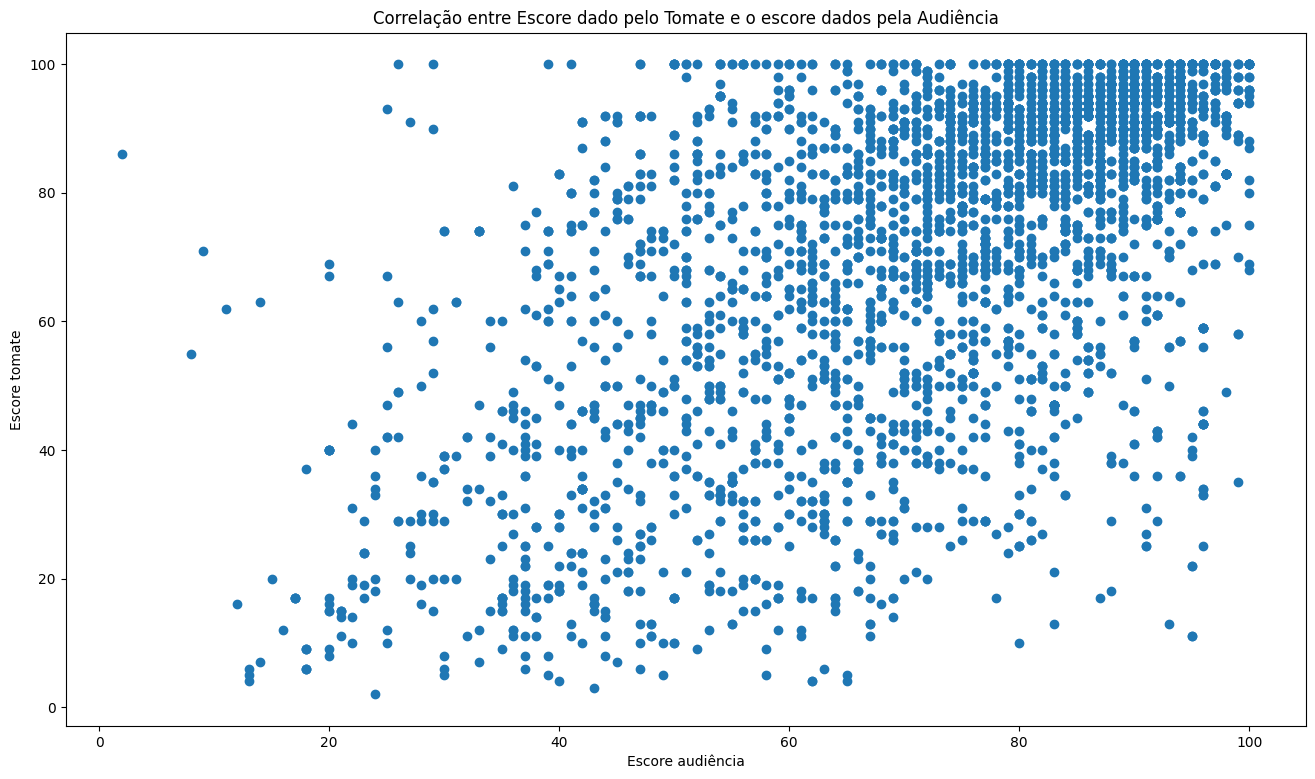

In [ ]:
#Obeservanmdo o gráficos
plt.figure(figsize=(16,9))
plt.scatter(dados['Escore_audiência'],dados['Escore_tomate'])
plt.title('Correlação entre Escore dado pelo Tomate e o escore dados pela Audiência')
plt.xlabel('Escore audiência')
plt.ylabel('Escore tomate')
plt.show()

In [ ]:
#Correlação entre Escores dados pela audiência e a do tomate
np.corrcoef(dados['Escore_audiência'],dados['Escore_tomate'])

array([[1.        , 0.58971597],
       [0.58971597, 1.        ]])

Temos uma correção positiva entre os dados de escore do tomamte e da audiência, sendo ela de 58%.

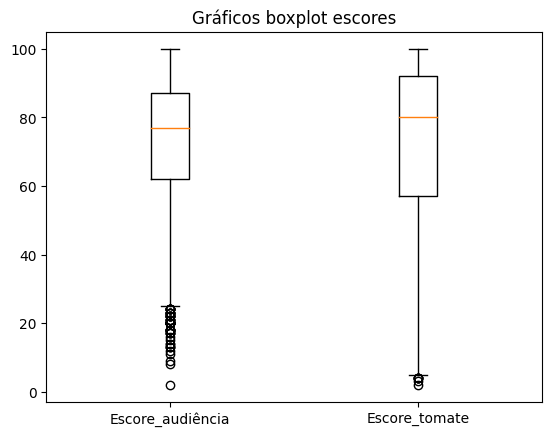

In [ ]:
plt.boxplot(dados[['Escore_audiência', 'Escore_tomate']])
plt.title('Gráficos boxplot escores')
plt.xticks( [1,2], ['Escore_audiência','Escore_tomate'])
plt.show()

In [ ]:
dados[['Escore_tomate','Escore_audiência']].describe()

,Escore_tomate,Escore_audiência
count,3668.000000,3668.000000
mean,72.122137,72.891767
std,24.541752,18.266413
min,2.000000,2.000000
25%,57.000000,62.000000
50%,80.000000,77.000000
75%,92.000000,87.000000
max,100.000000,100.000000


A média entre as notas do tomate e da audiência são muito próximas e quartis próximos também.

# Correlação entre Escore dado pelo Tomate e o gênero do filme.

In [ ]:
grupo = dados.groupby('Gênero').mean()
grupo.sort_values('Escore_tomate')

<ipython-input-123-0424f6ef28fc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo = dados.groupby('Gênero').mean()


,Escore_tomate,Escore_audiência
Gênero,,
holiday,57.147727,60.375000
romance,62.630719,69.699346
sci_fi,65.027950,65.493789
fantasy,66.142857,83.000000
action,67.617647,74.247059
musical,68.383051,70.800000
comedy,69.906977,81.209302
kids_and_family,70.000000,87.500000
animation,70.000000,87.500000


Filmes do gênero news, special_interest, documentary, nature e short tendem a ter uma avaliação melhor pela crítica do tomate.
O gênero news em especial possui a maior média do tomate, porém tirou apenas 56 pela audiência, mostrando uma grande distorção entre os dados.

In [ ]:
grupo.sort_values('Escore_audiência')

,Escore_tomate,Escore_audiência
Gênero,,
news,100.000000,56.000000
holiday,57.147727,60.375000
horror,73.809045,65.030151
sci_fi,65.027950,65.493789
mystery_and_thriller,71.187692,68.855385
romance,62.630719,69.699346
stand_up,85.604651,69.930233
musical,68.383051,70.800000
crime,71.835556,72.795556


Filmes do gênero special_interest, kind_and_family, animation, nature e fantasy tendem a ter uma aliação melhor pela crítica da audiência.

In [ ]:
np.corrcoef(grupo['Escore_tomate'],grupo['Escore_audiência'])

array([[1.        , 0.15999036],
       [0.15999036, 1.        ]])

A correlação entre a média das notas por gênero entre a nota da audiência e a nota do tomate é muito baixa.

In [ ]:
grupo['Diferença'] = grupo['Escore_tomate'] - grupo['Escore_audiência']
grupo.loc[grupo['Diferença'] == grupo['Diferença'].max()]

,Escore_tomate,Escore_audiência,Diferença
Gênero,,,
news,100.0,56.0,44.0


A maior diferença entre os dados de nota por gênero foi a categoria News, onde teve uma diferênça de 44 pontos entre as avaliações.

# Correlação entre Escore dado pelo Tomate e a modalidade do filme.




In [ ]:
grupo_2 = dados.groupby('Modalidade').mean()
grupo_2

<ipython-input-78-c7b5eaef6ce5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo_2 = dados.groupby('Modalidade').mean()


,Escore_tomate,Escore_audiência
Modalidade,,
movies_at_home,72.003396,72.467459
movies_in_theaters,75.253731,84.082090


Filmes em cinêmas(movies_in_theaters) tendem a ter uma média maior de avaliação.

# **Correlação entre Escore e atores que participam do filme.**




Puxando os nomes dos atores

In [ ]:
atores = dados['Nome_Ator']
nome_de_atores_cada_filme = []
for lista in atores:
  nomes = lista.split(',')
  nova_lista = []
  for x in nomes:
    retirando_barra_n = re.sub(r'\\n\b','',x)
    busca = re.findall(r'\w+',retirando_barra_n)
    busca = ' '.join(map(str,busca))
    nova_lista.append(busca)
  nome_de_atores_cada_filme.append(nova_lista)

dados['Atores_tratado'] = nome_de_atores_cada_filme

Puxando as notas de cada um dos atores

In [ ]:
atores_notas_de_seus_filmes = {}
media_notas_atores = {}
indice = 0
for filmes in nome_de_atores_cada_filme:

  for atores in filmes:
    filme_repetido = False
    if atores not in atores_notas_de_seus_filmes.keys():
      atores_notas_de_seus_filmes[atores] = []
      atores_notas_de_seus_filmes[atores].append((dados['Escore_tomate'].iloc[indice],dados['Título'].iloc[indice]))
    elif atores in atores_notas_de_seus_filmes.keys():
      for nome,filmes in atores_notas_de_seus_filmes[atores]:
        if filmes == dados['Título'].iloc[indice]:
          filme_repetido = True
      if filme_repetido == False:
        atores_notas_de_seus_filmes[atores].append((dados['Escore_tomate'].iloc[indice],dados['Título'].iloc[indice]))
  indice+=1

for nomes,notas_filme in atores_notas_de_seus_filmes.items():
    notas_lista = []
    for notas,filmes in notas_filme:
      notas_lista.append(notas)
    media = sum(notas_lista)/len(notas_lista)
    media_notas_atores[nomes] = (round(media,2),len(notas_lista))


In [ ]:
atores_notas_de_seus_filmes

{'Alban Lenoir': [(78.0, 'AKA')],
 'Éric Cantona': [(78.0, 'AKA'), (72.0, 'THE SALVATION')],
 'Thibault de Montalembert': [(78.0, 'AKA'),
  (90.0, 'ALL QUIET ON THE WESTERN FRONT')],
 'Sveva Alviti': [(78.0, 'AKA')],
 'Saïdou Camara': [(78.0, 'AKA')],
 'Noé Chabbat': [(78.0, 'AKA')],
 'Lucille Guillaume': [(78.0, 'AKA')],
 'Vincent Heneine': [(78.0, 'AKA')],
 'Morgan S Dalibert': [(78.0, 'AKA')],
 'Rémi Leautier': [(78.0, 'AKA')],
 'Viola Davis': [(94.0, 'THE WOMAN KING'),
  (90.0, 'THE SUICIDE SQUAD'),
  (38.0, 'BLACK ADAM'),
  (26.0, 'SUICIDE SQUAD'),
  (62.0, "ENDER'S GAME"),
  (81.0, 'PRISONERS'),
  (26.0, 'LAW ABIDING CITIZEN'),
  (91.0, 'WIDOWS'),
  (33.0, 'BLACKHAT'),
  (100.0, 'GIVING VOICE'),
  (92.0, 'AIR'),
  (97.0, "MA RAINEY'S BLACK BOTTOM"),
  (36.0, 'EAT PRAY LOVE')],
 'Thuso Mbedu': [(94.0, 'THE WOMAN KING')],
 'Lashana Lynch': [(94.0, 'THE WOMAN KING'),
  (79.0, 'CAPTAIN MARVEL'),
  (83.0, 'NO TIME TO DIE'),
  (92.0, "ROALD DAHL'S MATILDA THE MUSICAL")],
 'Sheila Atim'

Analisando correlação entre a média da nota do ator com as notas dos filmes em que ele participou.

In [ ]:
lista_media_notas =[]
for lista in nome_de_atores_cada_filme:
  soma_notas = 0
  for nomes in lista:
    soma_notas+=media_notas_atores[nomes][0]
  media_notas_atores_filme = soma_notas/len(lista)
  lista_media_notas.append(media_notas_atores_filme)
dados['Media_nota_atores_do_filme'] = lista_media_notas

Analisando a correlação entre a média das notas dos atores com a nota do filme.

In [ ]:
np.corrcoef(dados['Media_nota_atores_do_filme'],dados['Escore_tomate'])

array([[1.        , 0.93483508],
       [0.93483508, 1.        ]])

In [ ]:
np.corrcoef(dados['Media_nota_atores_do_filme'],dados['Escore_audiência'])

array([[1.        , 0.52103929],
       [0.52103929, 1.        ]])

Como a média também usa o valor do próprio ator, acaba distorcendo positivamente a correlação entre os dois parâmetros, por isso também fizemos eliminando a nota do próprio filme e caso o ator não tenha feito outro filme antes, tiramos ele do calculo.

In [ ]:
index = 0
lista_media_notas =[]
for lista in nome_de_atores_cada_filme:
  soma_notas = 0
  filmes = 0
  for nomes in lista:
    if len(atores_notas_de_seus_filmes[nomes]) >1:
      for nota,nome in atores_notas_de_seus_filmes[nomes]:
        if nome != dados['Título'].iloc[index]:
          soma_notas+=nota
          filmes+=1
      media_notas_atores_filme = soma_notas/filmes
      if media_notas_atores_filme == 0 and dados['Escore_tomate'].iloc[index] != 0:
        soma_notas = 0
        filmes = 0
        for nota,nome in atores_notas_de_seus_filmes[nomes]:
          soma_notas+=nota
          filmes+=1

        media_notas_atores_filme = soma_notas/filmes

  index+=1
  lista_media_notas.append(media_notas_atores_filme)
dados['Media_nota_atores_do_filme_filtrado'] = lista_media_notas
'''No caso acima pegamos como referência as notas dos atores que tem mais de um filme, excluindo o filme que ele participou para não influênciar
na correlação.'''

'No caso acima pegamos como referência as notas dos atores que tem mais de um filme, excluindo o filme que ele participou para não influênciar\nna correlação.'

Analisando a correlação entre a média das notas dos atores com a nota do filme.

In [ ]:
np.corrcoef(dados['Media_nota_atores_do_filme_filtrado'],dados['Escore_tomate'])
# Eliminando o próprio filme que estão atuando, percebemos que a nota que os atores obtiveram em outros filmes tem uma correlação fraca de 39% na nota do filme pelo tomate

array([[1.        , 0.39226374],
       [0.39226374, 1.        ]])

In [ ]:
np.corrcoef(dados['Media_nota_atores_do_filme_filtrado'],dados['Escore_audiência'])
# Eliminando o próprio filme que estão atuando, percebemos que a nota que os atores obtiveram em outros filmes tem uma correlação fraca de 21% na nota do filme pela audiência

array([[1.        , 0.21380198],
       [0.21380198, 1.        ]])

Analisando a maior média de nota dos atores

In [ ]:
nome_maiores_notas = [x for x in range(10)]
maiores_notas = [x for x in range(10)]
for nomes,notas1 in media_notas_atores.items():
  notas,quant = notas1
  if notas > min(maiores_notas) and quant>=3:
    indice_menor_numero = maiores_notas.index(min(maiores_notas))
    maiores_notas.pop(indice_menor_numero)
    nome_maiores_notas.pop(indice_menor_numero)
    maiores_notas.append(notas)
    nome_maiores_notas.append(nomes)
for x in zip(nome_maiores_notas,maiores_notas):
  print(*x,sep=': ')

Megumi Han: 98.4
Laurene Powell Jobs: 98.8
Greg Boustead: 98.67
Jessica Harrop: 98.67
Adrian: 99.33
Steve James: 98.67
T Griffin: 98.75
Vinnie Malhotra: 99.33
Sheila Nevins: 98.6
Douglas Shearer: 99.33


Filmes com os atores acimam vão tender a ter uma média maior de valiação pelo tomate.

In [ ]:
# Fazendo o mesmo procedimento para a avaliação da audiência.
atores_notas_de_seus_filmes = {}
media_notas_atores = {}
indice = 0
for filmes in nome_de_atores_cada_filme:

  for atores in filmes:
    filme_repetido = False
    if atores not in atores_notas_de_seus_filmes.keys():
      atores_notas_de_seus_filmes[atores] = []
      atores_notas_de_seus_filmes[atores].append((dados['Escore_audiência'].iloc[indice],dados['Título'].iloc[indice]))
    elif atores in atores_notas_de_seus_filmes.keys():
      for nome,filmes in atores_notas_de_seus_filmes[atores]:
        if filmes == dados['Título'].iloc[indice]:
          filme_repetido = True
      if filme_repetido == False:
        atores_notas_de_seus_filmes[atores].append((dados['Escore_audiência'].iloc[indice],dados['Título'].iloc[indice]))
  indice+=1

for nomes,notas_filme in atores_notas_de_seus_filmes.items():
    notas_lista = []
    for notas,filmes in notas_filme:
      notas_lista.append(notas)
    media = sum(notas_lista)/len(notas_lista)
    media_notas_atores[nomes] = (round(media,2),len(notas_lista))

index = 0
lista_media_notas =[]
for lista in nome_de_atores_cada_filme:
  soma_notas = 0
  filmes = 0
  for nomes in lista:
    if len(atores_notas_de_seus_filmes[nomes]) >1:
      for nota,nome in atores_notas_de_seus_filmes[nomes]:
        if nome != dados['Título'].iloc[index]:
          soma_notas+=nota
          filmes+=1
      media_notas_atores_filme = soma_notas/filmes
      if media_notas_atores_filme == 0 and dados['Escore_audiência'].iloc[index] != 0:
        soma_notas = 0
        filmes = 0
        for nota,nome in atores_notas_de_seus_filmes[nomes]:
          soma_notas+=nota
          filmes+=1

        media_notas_atores_filme = soma_notas/filmes

  index+=1
  lista_media_notas.append(media_notas_atores_filme)
dados['Media_nota_audiência_atores_do_filme_filtrado'] = lista_media_notas
nome_maiores_notas = [x for x in range(10)]
maiores_notas = [x for x in range(10)]
for nomes,notas1 in media_notas_atores.items():
  notas,quant = notas1
  if notas > min(maiores_notas) and quant>=3:
    indice_menor_numero = maiores_notas.index(min(maiores_notas))
    maiores_notas.pop(indice_menor_numero)
    nome_maiores_notas.pop(indice_menor_numero)
    maiores_notas.append(notas)
    nome_maiores_notas.append(nomes)
for x in zip(nome_maiores_notas,maiores_notas):
  print(*x,sep=': ')

Polly Morgan: 95.67
David Prowse: 95.67
Robert Watts: 95.67
Mark Rolston: 95.33
Andrew Erwin: 96.5
Jon Erwin: 96.5
Jon Gunn: 98.33
Daryl C Lefever: 96.0
Kevin Downes: 96.5
Eli Roth: 96.0


Percebemos que para a audiência os atores com a maior média de nota é diferente. Sendo esses melhor avaliados pela audiência.

# **Correlação entre a quantidade de atores e a nota do filme.**

In [ ]:
lista_quantidade_atores = []
for lista in nome_de_atores_cada_filme:
  quantidade_atores = len(lista)
  lista_quantidade_atores.append(quantidade_atores)
dados['Quantidade de atores'] = lista_quantidade_atores

Medindo a correlação entre a nota e a quantidade de atores

In [ ]:
np.corrcoef(dados['Quantidade de atores'],dados['Escore_tomate'])

array([[ 1.        , -0.20229256],
       [-0.20229256,  1.        ]])

Temos uma correlação levemente negativa entre a quantidade de atores e o escore do tomate

In [ ]:
np.corrcoef(dados['Quantidade de atores'],dados['Escore_audiência'])

array([[ 1.        , -0.01505298],
       [-0.01505298,  1.        ]])

Correlação praticamente nula entre quantidade de atores e o escore da audiência.

# **Correlação entre a sinopse e a nota.**

In [ ]:
quantidade_palavras = []
quantidade_caracteres = []
palavras_usadas = []
for sinopse in dados['Sinopse']:
  caracteres = len(sinopse)
  palavras = sinopse.split(' ')
  quant_palavras = len(palavras)
  quantidade_palavras.append(quant_palavras)
  quantidade_caracteres.append(caracteres)
  palavras_usadas.append(palavras)

dados['quantidade_palavras'] = quantidade_palavras
dados['quantidade_caracteres'] = quantidade_caracteres
dados['palavras_usadas_na_sinopse'] = palavras_usadas

In [ ]:
np.corrcoef(dados['quantidade_palavras'],dados['Escore_tomate'])

array([[ 1.        , -0.04625785],
       [-0.04625785,  1.        ]])

In [ ]:
np.corrcoef(dados['quantidade_palavras'],dados['Escore_audiência'])

array([[1.        , 0.05253808],
       [0.05253808, 1.        ]])

In [ ]:
np.corrcoef(dados['quantidade_caracteres'],dados['Escore_tomate'])

array([[ 1.        , -0.03955336],
       [-0.03955336,  1.        ]])

In [ ]:
np.corrcoef(dados['quantidade_caracteres'],dados['Escore_audiência'])

array([[1.        , 0.05726601],
       [0.05726601, 1.        ]])

A correlação é praticamente nula entre a quantidade de palavras e de caracteres em relação a nota dada pelo tomate e audiência.

In [ ]:
# Palavras usadas em relação a sua nota
dict_palavras_nota ={}
dict_media_por_palavra = {}
valor_indice = 0
for lista_palavras in palavras_usadas:
  for palavra in lista_palavras:
    if palavra not in dict_palavras_nota.keys():
      dict_palavras_nota[palavra] = []
      dict_palavras_nota[palavra].append(dados['Escore_tomate'].iloc[valor_indice])
    else:
      dict_palavras_nota[palavra].append(dados['Escore_tomate'].iloc[valor_indice])
  valor_indice+=1
for palavra in dict_palavras_nota.keys():
  dict_media_por_palavra[palavra] = sum(dict_palavras_nota[palavra])/len(dict_palavras_nota[palavra])

In [ ]:
dict_media_por_palavra

{'In': 73.21594684385381,
 'this': 73.24197530864197,
 'intense': 66.79166666666667,
 'action': 68.0,
 'thriller,': 76.23076923076923,
 'a': 71.36991062562066,
 'special': 77.40322580645162,
 'ops': 71.42857142857143,
 'agent': 69.45360824742268,
 'goes': 74.5530303030303,
 'undercover': 66.25,
 'within': 76.66129032258064,
 'criminal': 74.31506849315069,
 'organization': 63.333333333333336,
 'and': 72.39989051594361,
 'unexpectedly': 62.34285714285714,
 'befriends': 69.52380952380952,
 'the': 72.03089820359281,
 "boss's": 77.0,
 'young': 71.28138528138528,
 'son.': 72.22727272727273,
 'The': 74.37113402061856,
 'Woman': 84.125,
 'King': 67.72,
 'is': 71.1411620294599,
 'remarkable': 78.72,
 'story': 76.45980707395498,
 'of': 72.5817843866171,
 'Agojie,': 94.0,
 'all-female': 82.11111111111111,
 'unit': 79.47619047619048,
 'warriors': 70.35714285714286,
 'who': 71.04748603351955,
 'protected': 80.0,
 'African': 74.24242424242425,
 'Kingdom': 79.83333333333333,
 'Dahomey': 94.0,
 'in': 

In [ ]:
nome_maiores_notas = [x for x in range(10)]
maiores_notas = [x for x in range(10)]
for palavra in dict_media_por_palavra.keys():
  if len(dict_palavras_nota[palavra]) >= 6:
    if dict_media_por_palavra[palavra] > min(maiores_notas):
      nome_maiores_notas.pop(maiores_notas.index(min(maiores_notas)))
      maiores_notas.pop(maiores_notas.index(min(maiores_notas)))
      maiores_notas.append(dict_media_por_palavra[palavra])
      nome_maiores_notas.append(palavra)
for x in zip(nome_maiores_notas,maiores_notas):
  print(*x,sep=': ')

Mugen: 98.0
marines: 98.0
Yuta: 98.0
Jujutsu: 98.0
Fox's: 99.0
incurable: 99.0
Beauty: 98.33333333333333
transgender: 98.0
Mack: 100.0
Bono: 100.0


Os filmes que tem as palavras acima na sua sinopse tendem a ter uma nota maior em suas avaliações do tomate. Para fazer essa análise pegamos palavras que apareceram pelo menos 6 vezes.



In [ ]:
# Fazendo o mesmo procedimento acima, mas para a nota da audiência.
dict_palavras_nota ={}
dict_media_por_palavra = {}
valor_indice = 0
for lista_palavras in palavras_usadas:
  for palavra in lista_palavras:
    if palavra not in dict_palavras_nota.keys():
      dict_palavras_nota[palavra] = []
      dict_palavras_nota[palavra].append(dados['Escore_audiência'].iloc[valor_indice])
    else:
      dict_palavras_nota[palavra].append(dados['Escore_audiência'].iloc[valor_indice])
  valor_indice+=1
for palavra in dict_palavras_nota.keys():
  dict_media_por_palavra[palavra] = sum(dict_palavras_nota[palavra])/len(dict_palavras_nota[palavra])
nome_maiores_notas = [x for x in range(10)]
maiores_notas = [x for x in range(10)]
for palavra in dict_media_por_palavra.keys():
  if len(dict_palavras_nota[palavra]) >= 6:
    if dict_media_por_palavra[palavra] > min(maiores_notas):
      nome_maiores_notas.pop(maiores_notas.index(min(maiores_notas)))
      maiores_notas.pop(maiores_notas.index(min(maiores_notas)))
      maiores_notas.append(dict_media_por_palavra[palavra])
      nome_maiores_notas.append(palavra)
for x in zip(nome_maiores_notas,maiores_notas):
  print(*x,sep=': ')

ambush,: 98.0
Herculean: 98.0
Kinley’s: 98.0
promised,: 98.0
Tanjiro: 99.0
Mugen: 99.0
AIR: 98.85714285714286
JESUS: 99.0
REVOLUTION: 99.0
Caro: 100.0


Percebemos que algumas palavras mudaram e vale salientar que a palavra Jesus na sinopse ajuda na avaliação do filme, mostrando que a crença pode ter algo relacionado a avaliação dada.

# **Correlação entre o idioma do filme e sua nota.**

In [ ]:
indice = 0
lista_idiomas = []
for informacoes in dados['Informações']:
  try:
    idioma = re.search('Original Language: (\w+)',informacoes)
    lista_idiomas.append(idioma.group(1))
  except:
    lista_idiomas.append('Indefinido')
dados['Idioma_do_filme'] = lista_idiomas

In [ ]:
grupo_idioma = dados.groupby('Idioma_do_filme')[['Escore_tomate','Escore_audiência']].mean()
grupo_idioma.sort_values('Escore_tomate')

,Escore_tomate,Escore_audiência
Idioma_do_filme,,
Serbian,47.000000,43.000000
Unknown,65.000000,79.000000
Hindi,67.933333,63.400000
English,70.713509,72.340586
Swedish,74.000000,70.000000
Polish,76.333333,83.333333
Japanese,82.816667,80.800000
French,82.923077,76.666667
Arabic,83.000000,67.000000


Filmes no idioma Turkish, Romanian, Russian, Swahili e Marathi tendem a ter uma maior avaliação pelo Tomate.

In [ ]:
grupo_idioma.sort_values('Escore_audiência')

,Escore_tomate,Escore_audiência
Idioma_do_filme,,
Serbian,47.000000,43.000000
Marathi,96.000000,60.000000
Icelandic,86.000000,61.000000
Thai,87.000000,62.000000
Greek,86.000000,62.000000
Hindi,67.933333,63.400000
Danish,91.500000,65.300000
Arabic,83.000000,67.000000
Norwegian,86.333333,67.444444


Já filmes no idioma Berlarusian, Telugu, Portuguese, Tamil e Kallallisut tendem a ter uma melhor avaliação pela audiência.

# **Analisando a nota de filmes produzidos pela Netflix.**

In [ ]:
filmes_netflix = {'Título':[],'Nota_tomate':[],'Nota_audiência':[]}
indice = 0
for i in dados['Informações']:
  netflix = re.search('Netflix',i)
  if netflix != None:
    nota_tomate = dados['Escore_tomate'].iloc[indice]
    nota_audiencia = dados['Escore_audiência'].iloc[indice]
    filmes_netflix['Título'].append(dados['Título'].iloc[indice])
    filmes_netflix['Nota_tomate'].append(nota_tomate)
    filmes_netflix['Nota_audiência'].append(nota_audiencia)
  indice += 1

data_frame = pd.DataFrame(filmes_netflix)
data_frame.describe()

,Nota_tomate,Nota_audiência
count,165.000000,165.000000
mean,74.587879,73.066667
std,19.942903,16.130993
min,24.000000,26.000000
25%,63.000000,62.000000
50%,81.000000,76.000000
75%,90.000000,85.000000
max,100.000000,99.000000


Filmes são produzidos com alguma parceria da Netflix tem em média 74 de nota pelo tomate e 73 de nota pela audiência. Sendo o seu primeiro quartil de 63 pontos, ou seja, temos 75% de chance do filme ter pelo menos 63 pontos de avaliação pelo tomate e de 62 pela audiência.

# **Correlação entre o nome do personagem e a nota do filme.**

In [ ]:
notas_nomes_personagens = []
for lista in dados['Nome_Personagem']:
  nomes = lista.split(',')
  nova_lista = []
  for nome in nomes:
    retirando_barra_n = re.sub(r'\\n\b','',nome)
    nome_personagem = re.findall(r'\w+',retirando_barra_n)
    nome_personagem = ' '.join(map(str,nome_personagem))
    if nome_personagem not in ['Director','Screenwriter','Producer','Executive Producer','Film Editing','Production Design','Art Director','Set Decoration','Costume Design','Casting','Original Music','Cinematographer','Writer','Co Producer','Film Editor',
                               'Music Supervisor','Music','Associate Producer','Assistant Makeup Artist','Supervising Sound Editor','','Makeup Artist','Production Supervisor','Unit Production Manager','Key Hair Stylist']:
      nova_lista.append(nome_personagem)
  notas_nomes_personagens.append(nova_lista)


In [ ]:
nome_maiores_notas = [x for x in range(10)]
maiores_notas = [x for x in range(10)]
index = 0
nota_personagens = {}
media_notas_personagens = {}
for lista in notas_nomes_personagens:
  for nomes in lista:
    if nomes not in nota_personagens.keys():
      nota_personagens[nomes] = []
      nota_personagens[nomes].append((dados['Escore_tomate'].iloc[index],dados['Escore_audiência'].iloc[index]))
    else:
      nota_personagens[nomes].append((dados['Escore_tomate'].iloc[index],dados['Escore_audiência'].iloc[index]))
  index += 1
for nomes in nota_personagens.keys():
  media_tomate = sum([x for x,y in nota_personagens[nomes]])/len(nota_personagens[nomes])
  media_audiencia = sum([y for x,y in nota_personagens[nomes]])/len(nota_personagens[nomes])
  media_notas_personagens[nomes] = (media_tomate,media_audiencia)
for nomes in media_notas_personagens.keys():
  if media_notas_personagens[nomes][0] > min(maiores_notas):
    indice = maiores_notas.index(min(maiores_notas))
    maiores_notas.pop(indice)
    nome_maiores_notas.pop(indice)
    maiores_notas.append(media_notas_personagens[nomes][0])
    nome_maiores_notas.append(nomes)
print('*Nota do tomate.*')
for x in zip(nome_maiores_notas,maiores_notas):
  print(*x)


*Nota do tomate.*
The Terminator 100.0
Lieutenant Ed Traxler 100.0
Detective Vukovich 100.0
Matt Buchanan 100.0
Ginger Ventura 100.0
Pawnshop Clerk 100.0
Future Terminator 100.0
Punk Leader 100.0
Kikuchiyo 100.0
Kambei Shimada 100.0


In [ ]:
nome_maiores_notas = [x for x in range(10)]
maiores_notas = [x for x in range(10)]
for nomes in media_notas_personagens.keys():
  if media_notas_personagens[nomes][1] > min(maiores_notas):
    indice = maiores_notas.index(min(maiores_notas))
    maiores_notas.pop(indice)
    nome_maiores_notas.pop(indice)
    maiores_notas.append(media_notas_personagens[nomes][0])
    nome_maiores_notas.append(nomes)
print('*Nota da audiência.*')
for x in zip(nome_maiores_notas,maiores_notas):
  print(*x)

*Nota da audiência.*
Toge Inumaki Voice 98.0
Gilbert Bougainvillea Voice 100.0
Amuro Ray Voice 100.0
Cucuruz Doan Voice 100.0
Bright Noa Voice 100.0
Kai Shiden Voice 100.0
Sayla Mass Voice 100.0
Hayato Kobayashi Voice 100.0
Motoko Kusanagi Voice 100.0
Kanji Watanabe Chief of Citizen s Section 98.0


Filmes cujo o nome dos personagens estão acima tiveram uma melhor avaliação pelo tomate ou pela audiência.

# **Correlação entre Escore e as avaliações.**

In [ ]:
# Atribuindo valoes a cada avaliação do tomate
lista = []
for i in dados['Avaliação_tomate']:
  match i:
    case 'rotten':
      lista.append(0)
    case 'fresh':
      lista.append(1)

    case 'certified-fresh':
      lista.append(2)


dados['Avaliação_tomate_numericas'] = lista
np.corrcoef(dados['Avaliação_tomate_numericas'],dados['Escore_tomate'])

array([[1.       , 0.8389348],
       [0.8389348, 1.       ]])

Temos uma forte correlação de 83% entre os Escores do tomate e as avaliações do tomate.

In [ ]:
# Atribuindo valoes a cada avaliação da audiência
lista = []
for i in dados['Avaliação_audiência']:
  match i:
    case 'spilled':
      lista.append(0)
    case 'upright':
      lista.append(1)

dados['Avaliação_audiência_numerico'] = lista
np.corrcoef(dados['Avaliação_audiência_numerico'],dados['Escore_audiência'])

array([[1.        , 0.81662638],
       [0.81662638, 1.        ]])

Temos uma forte correlação de 81% entre os Escores da audiência e as avaliações da audiência.

# **Correlação entre o Título e os Escores.**



In [ ]:
lista_palavras = []
index = 0
palavra_nota = {}
media_nota = {}
for i in dados['Título']:
    titulo = i.split(' ')
    for palavra in titulo:
      if palavra not in palavra_nota.keys():
        palavra_nota[palavra] = []
        palavra_nota[palavra].append((dados['Escore_tomate'].iloc[index],dados['Escore_audiência'].iloc[index]))
      else:
        palavra_nota[palavra].append((dados['Escore_tomate'].iloc[index],dados['Escore_audiência'].iloc[index]))
    index+=1
for palavra in palavra_nota.keys():
  media_audiencia = sum([y for x,y in palavra_nota[palavra]])/len(palavra_nota[palavra])
  media_tomate = sum([x for x,y in palavra_nota[palavra]])/len(palavra_nota[palavra])
  media_nota[palavra] = (media_tomate,media_audiencia)

nome_maiores_notas = [x for x in range(10)]
maiores_notas = [x for x in range(10)]
for nomes in media_nota.keys():
  if len(palavra_nota[nomes]) >= 3:
    if media_nota[nomes][0] > min(maiores_notas):
      indice = maiores_notas.index(min(maiores_notas))
      maiores_notas.pop(indice)
      nome_maiores_notas.pop(indice)
      maiores_notas.append(media_nota[nomes][0])
      nome_maiores_notas.append(nomes)
print('*Nota do tomate.*')
for x in zip(nome_maiores_notas,maiores_notas):
  print(*x)

*Nota do tomate.*
MUGEN 98.0
TOY 98.75
STILL: 99.0
SHADOW 98.25
BEAUTY: 100.0
MUSTANG 100.0
HIS 98.0
CHANGING 100.0
SENSE 99.0
WAIT 100.0


As palavras acima quando estão no título, apresentam uma maior nota em sua avaliação pelo tomate.

In [ ]:
nome_maiores_notas = [x for x in range(10)]
maiores_notas = [x for x in range(10)]
for nomes in media_nota.keys():
  if len(palavra_nota[nomes]) >= 3:
    if media_nota[nomes][1] > min(maiores_notas):
      indice = maiores_notas.index(min(maiores_notas))
      maiores_notas.pop(indice)
      nome_maiores_notas.pop(indice)
      maiores_notas.append(media_nota[nomes][0])
      nome_maiores_notas.append(nomes)
print('*Nota da audiência.*')
for x in zip(nome_maiores_notas,maiores_notas):
  print(*x)

*Nota da audiência.*
SLAYER 98.0
-KIMETSU 98.0
YAIBA- 98.0
MUGEN 98.0
GANGSTER, 97.0
COP, 97.0
FOX 97.8
STILL: 99.0
BEAUTY: 100.0
MUSTANG 100.0


As palavras acima quando estão no título, apresentam uma maior nota em sua avaliação pela audiência.

In [ ]:
quantidade_palavas_do_titulo = []
for i in dados['Título']:
    titulo = i.split(' ')
    quantidade_palavas_do_titulo.append(len(titulo))
dados['Quantidade_palavras_titulo'] = quantidade_palavas_do_titulo

np.corrcoef(dados['Quantidade_palavras_titulo'],dados['Escore_tomate'])

array([[1.        , 0.03884869],
       [0.03884869, 1.        ]])

In [ ]:
np.corrcoef(dados['Quantidade_palavras_titulo'],dados['Escore_audiência'])

array([[1.        , 0.10798325],
       [0.10798325, 1.        ]])

A correlação entre a quantidade de palavras que tem no título tem uma baixa correlação com a nota dada pelo tomate ou pela audiência.

# Correlações espúria
São correlações que são sem sentido ou logicamente não explicada, por isso descartamos do estudo, são elas as colunas sobre:
*   Link do perfil do altor
*   Link do site
*   A coluna mined traduzido para Minado(Essa coluna tem apenas a letra T escrita nela e está presente em todas as colunas)












# **Conclusão**

Com efeito, a correlação mais forte encontrada nos dados foram entre os Escores e as avaliações, tanto da parte do tomate quanto da parte da audiência. Logo em seguida encontramos algunas correlações também importantes, como entre o Escore do tomate e Escore da audiência, média de nota obtida em outros filme em relação a um filme participado. São todas correlações positivas que influênciam diretamente na nota do filme.

Diante disso, também se foi percebido que alguns gêneros de filmes tendem a ter escores maiores, tanto pela parte do tomate quanto pela parte da audiência. Assim, outras relações parecidas foram notadas, como: Idioma, atores, personagens, assistir o filme em casa ou no cinema, palavras usadas nas sinopses e no título.

Apesar das conexões entre os dados, também encontramos relações fracas entre eles, como: Quantidade de atores, quantidade de palavras e de caracteres na sinopse, número de palavras no título.

Por fim, descartamos algumas colunas do estudo pois suas correlação é espúria, como o link do site, ator e uma coluna chamada mined onde todos os valores eram a letra 'T'.